In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.stats import zscore

In [3]:
df = pd.read_csv('/content/Walmart.csv')

In [4]:
df.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [8]:
df.index = df['Date']
del df['Date']
df.head(5)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106


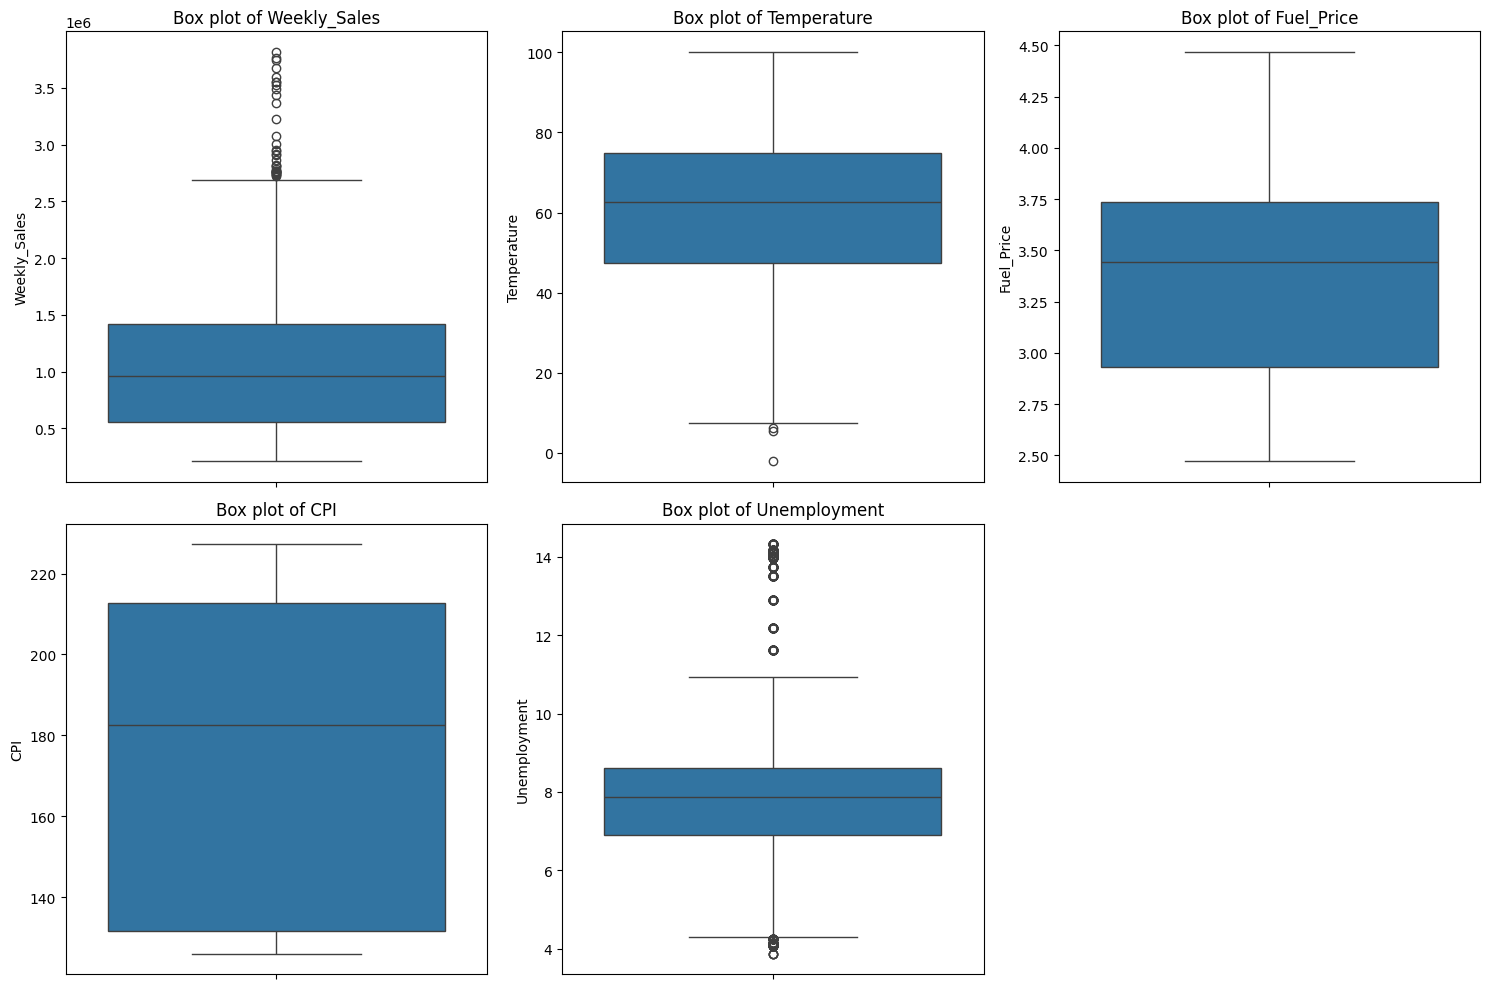

In [9]:
numerical_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [10]:
for col in ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'Unemployment']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

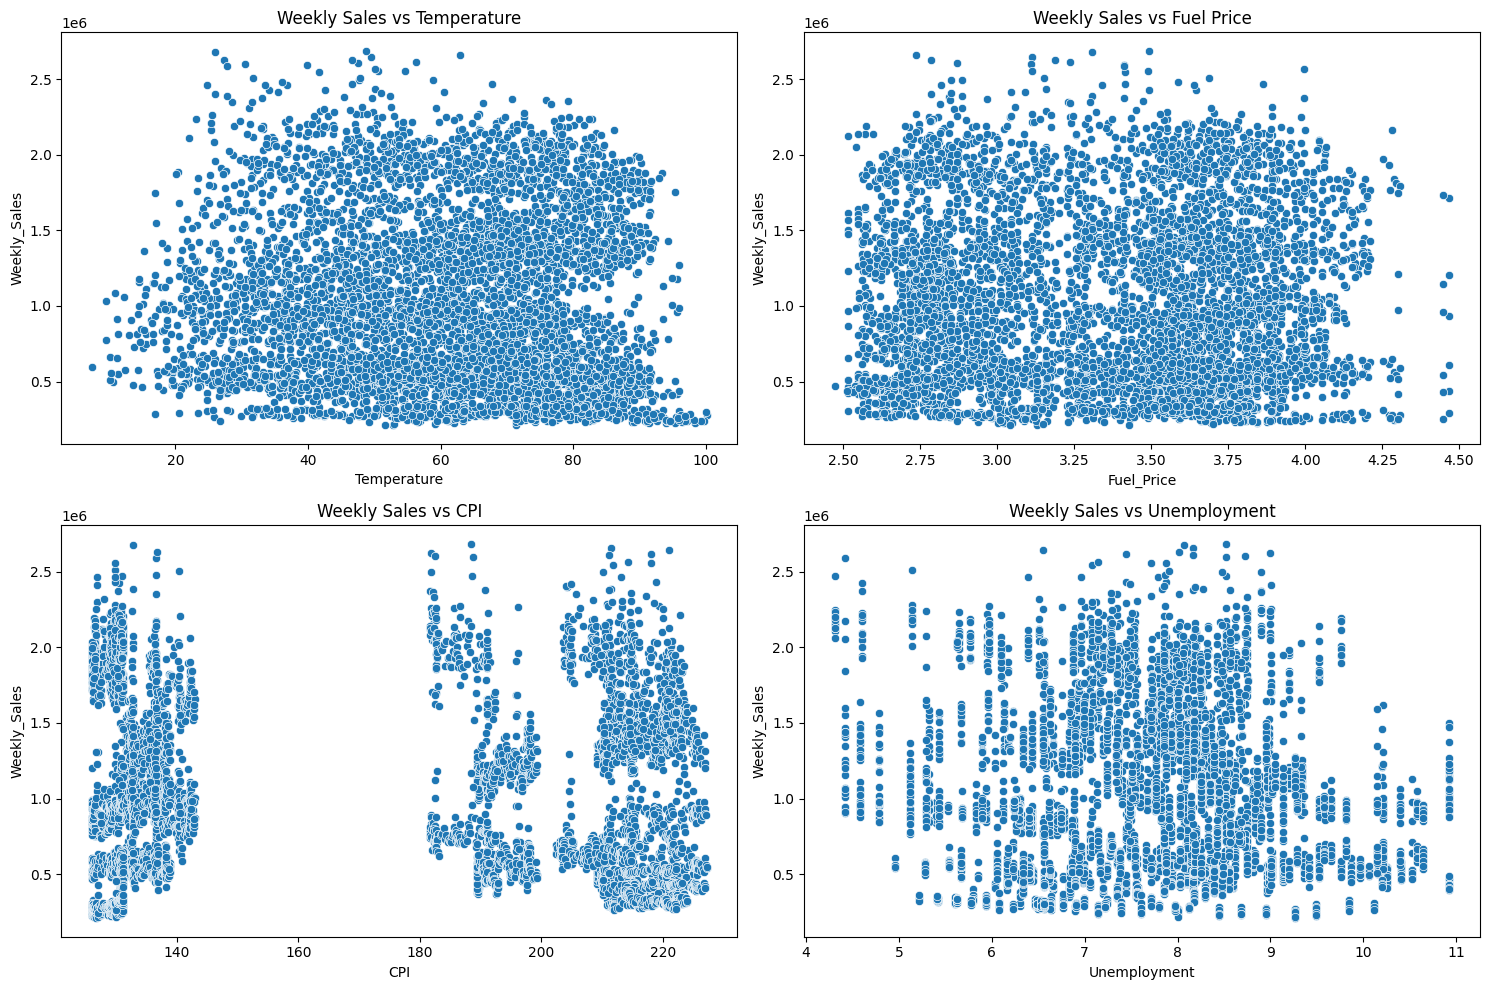

In [11]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs Temperature')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs Fuel Price')

plt.subplot(2, 2, 3)
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs CPI')

plt.subplot(2, 2, 4)
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs Unemployment')

plt.tight_layout()
plt.show()

In [12]:
correlation_matrix = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
display(correlation_matrix)

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,-0.041686,0.019664,-0.082977,-0.073092
Temperature,-0.041686,1.000000,0.145157,0.217847,0.024204
Fuel_Price,0.019664,0.145157,1.000000,-0.144515,-0.105214
CPI,-0.082977,0.217847,-0.144515,1.000000,-0.219020
Unemployment,-0.073092,0.024204,-0.105214,-0.219020,1.000000


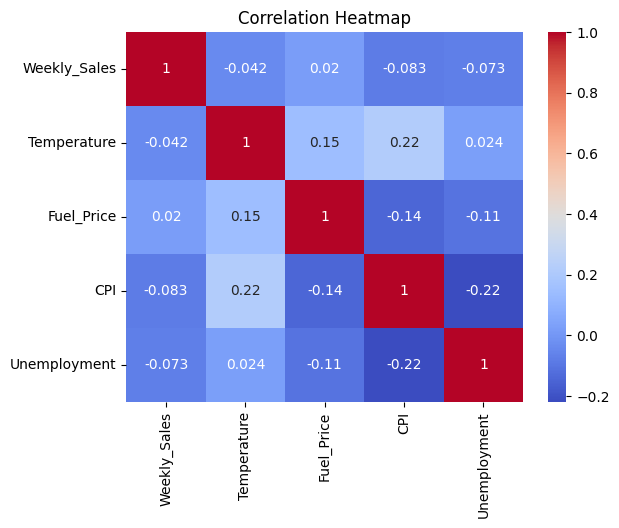

In [13]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

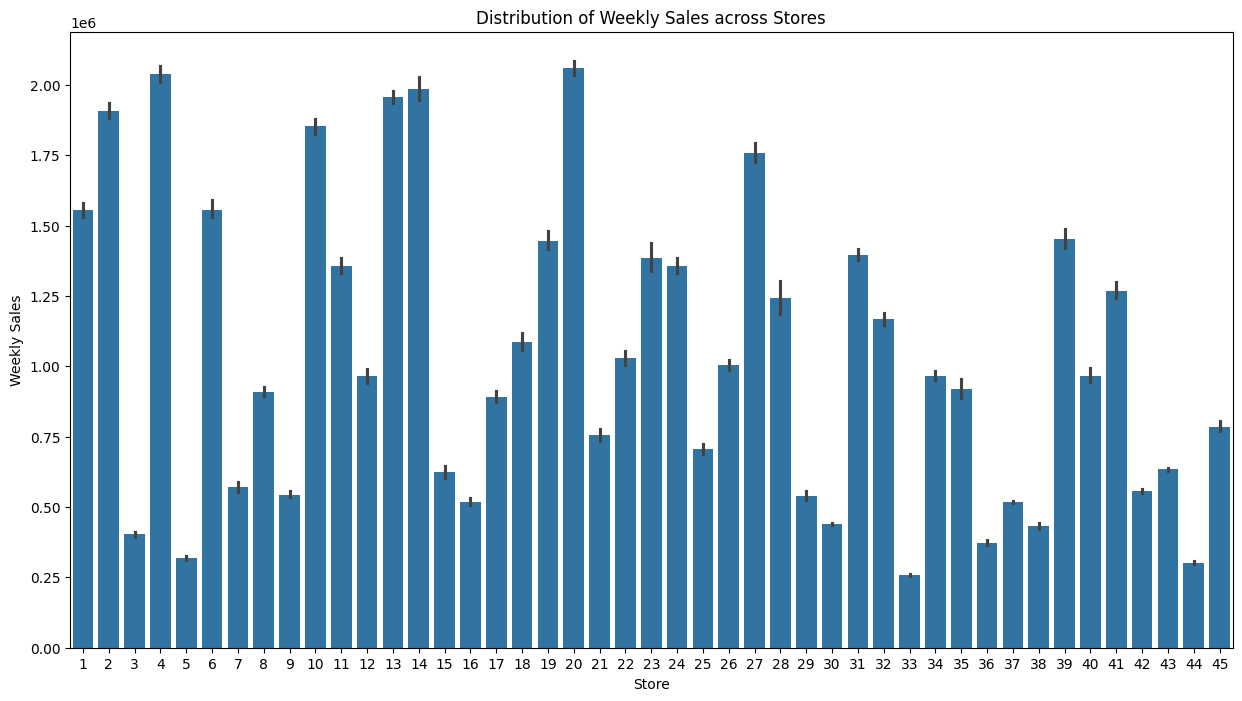

In [14]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Store', y='Weekly_Sales', data=df)
plt.title('Distribution of Weekly Sales across Stores')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.show()

In [15]:
average_sales_by_store = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)

In [16]:
print("top 5 Stores with highest average weekly sales:")
print(average_sales_by_store.head(5))

print("\ntop 5 Stores with lowest average weekly sales:")
print(average_sales_by_store.tail(5))

top 5 Stores with highest average weekly sales:
Store
20    2.058998e+06
4     2.038739e+06
14    1.986529e+06
13    1.957682e+06
2     1.905830e+06
Name: Weekly_Sales, dtype: float64

top 5 Stores with lowest average weekly sales:
Store
3     402704.441049
36    373511.992797
5     318011.810490
44    302748.866014
33    259861.692028
Name: Weekly_Sales, dtype: float64


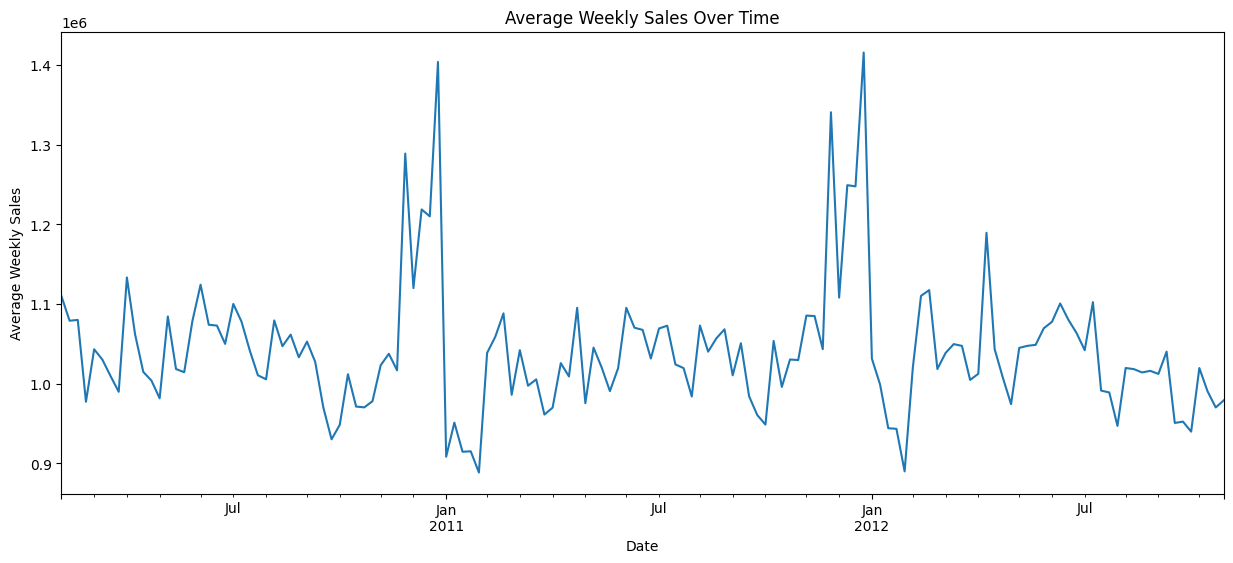

In [17]:
weekly_sales = df['Weekly_Sales'].resample('W').mean()

plt.figure(figsize=(15, 6))
weekly_sales.plot()
plt.title('Average Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales')
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(weekly_sales)

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

if adf_test[1] <= 0.05:
    print("Reject the null hypothesis (H0), the data is stationary.")
else:
    print("Fail to reject the null hypothesis (H0), the data is non-stationary.")

ADF Statistic: -3.928879
p-value: 0.001832
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578
Reject the null hypothesis (H0), the data is stationary.


<Figure size 1500x800 with 0 Axes>

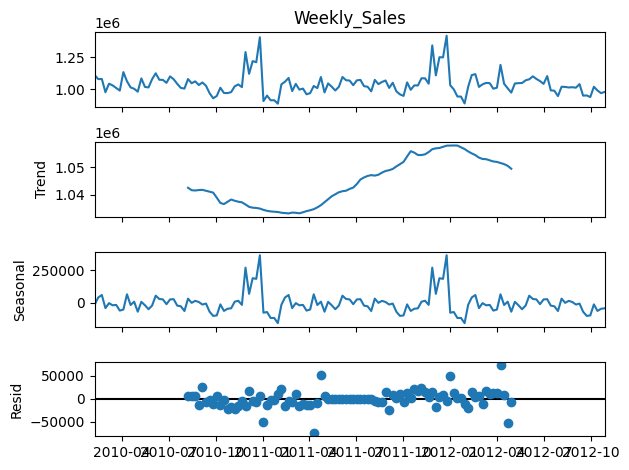

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(weekly_sales, model='additive')

plt.figure(figsize=(15, 8))
decomposition.plot()
plt.show()

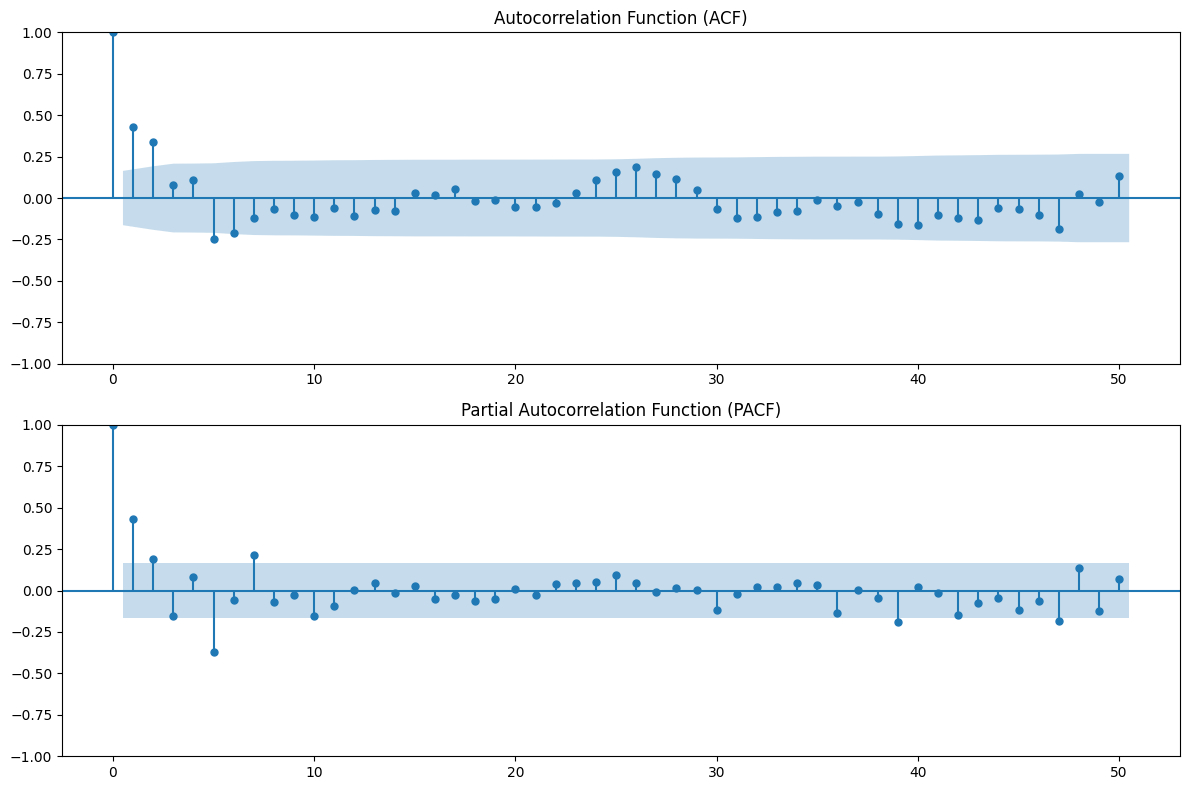

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 8))
plt.subplot(211)
plot_acf(weekly_sales, ax=plt.gca(), lags=50)
plt.title('Autocorrelation Function (ACF)')

plt.subplot(212)
plot_pacf(weekly_sales, ax=plt.gca(), lags=50)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [21]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train_data, test_data = train_test_split(weekly_sales, test_size=0.2, shuffle=False)

p = 2
d = 0  #stationary
q = 3

model = ARIMA(train_data, order=(p, d, q))

model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  114
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -1443.038
Date:                Thu, 17 Jul 2025   AIC                           2900.076
Time:                        05:08:23   BIC                           2919.230
Sample:                    02-07-2010   HQIC                          2907.849
                         - 04-08-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.047e+06   8466.834    123.600      0.000    1.03e+06    1.06e+06
ar.L1          0.2832      0.140      2.024      0.043       0.009       0.557
ar.L2          0.6183      0.176      3.504      0.0

In [22]:
predictions = model_fit.predict(start=len(train_data), end=len(weekly_sales)-1)

rmse = np.sqrt(mean_squared_error(test_data, predictions))

In [23]:
rmse

np.float64(53285.049354491945)

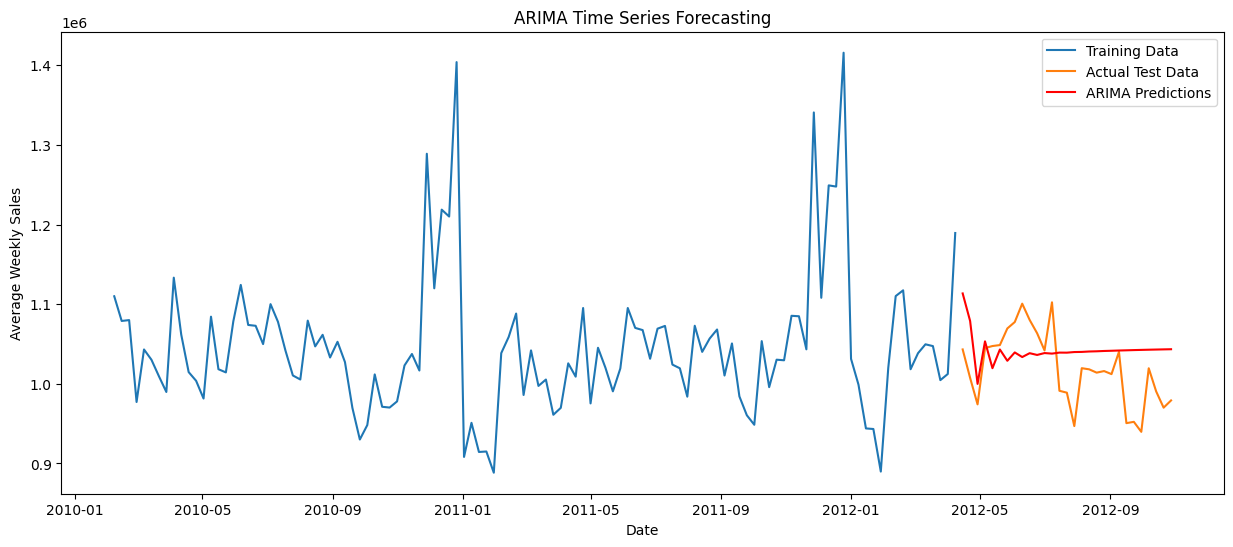

In [24]:
plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Test Data')
plt.plot(test_data.index, predictions, label='ARIMA Predictions', color='red')
plt.title('ARIMA Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales')
plt.legend()
plt.show()

In [25]:
weeks = 12
forecast = model_fit.forecast(steps=weeks)

last_date = weekly_sales.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=weeks + 1, freq='W')[1:]

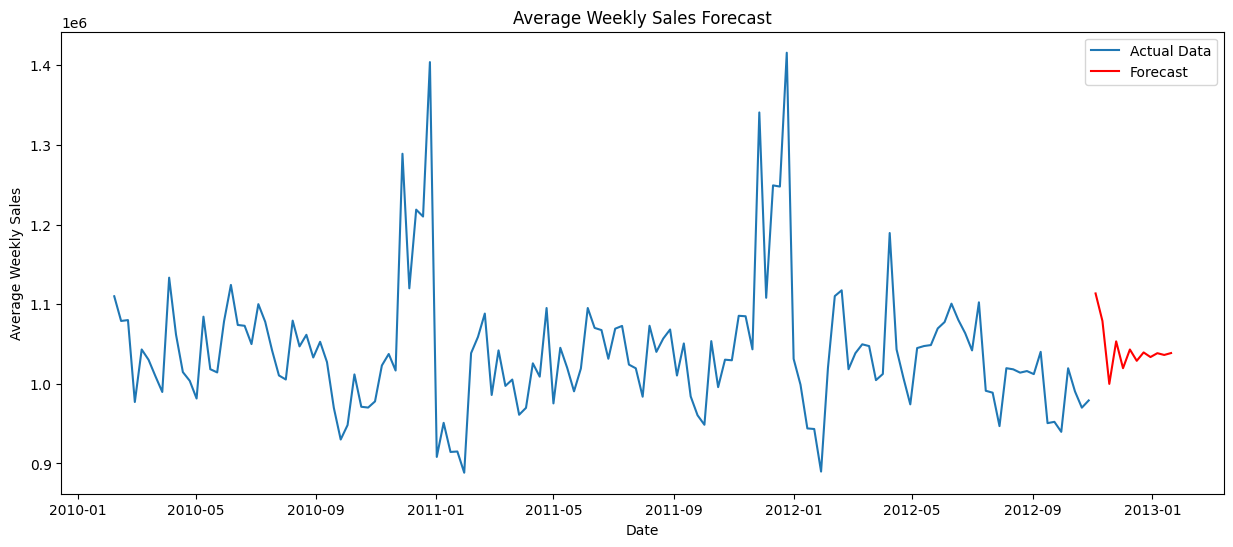

In [26]:
plt.figure(figsize=(15, 6))
plt.plot(weekly_sales.index, weekly_sales, label='Actual Data')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title('Average Weekly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales')
plt.legend()
plt.show()